In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #180161; font-size:100%; text-align:left; color:white">

<h3 align="center"><font color='#DAA520'>💡 About The data Columns :</font></h3>
    
We're studying to predict which customers respond positively to an automobile insurance offer.
    
**Gender**: Categorical variable indicating the gender of the customer.
    
**Age**: Numeric variable indicating the age of the customer.
    
**Driving_License**: Binary variable indicating if the customer has a driving license (1 if yes, 0 if no).
    
**Region_Code**: Numeric variable indicating the region code of the customer.
    
**Previously_Insured**: Binary variable indicating if the customer was previously insured (1 if yes, 0 if no).
    
**Vehicle_Age**: Categorical variable indicating the age of the vehicle.
    
**Vehicle_Damage**: Categorical variable indicating if the vehicle was damaged in the past.
    
**Annual_Premium**: Numeric variable indicating the annual premium amount.
    
**Policy_Sales_Channel**: Numeric variable indicating the sales channel of the policy.
    
**Vintage**: Numeric variable indicating the number of days the customer has been associated with the company.
    
**Response**: Binary target variable indicating if the customer responded positively to the automobile insurance offer (1 if yes, 0 if no).

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #180161; font-size:100%; text-align:left; color:white">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The objective of this competition is to predict which customers respond positively to an automobile insurance offer..

**Dataset**: The dataset for this competition (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Evaluation**: Submissions are evaluated using area under the ROC curve.

**Submission**: train.csv - the training dataset; Response is the binary target
test.csv - the test dataset; your objective is to predict the probability of Response for each row
sample_submission.csv - a sample submission file in the correct format

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">About ROC curve</h2>
</div>

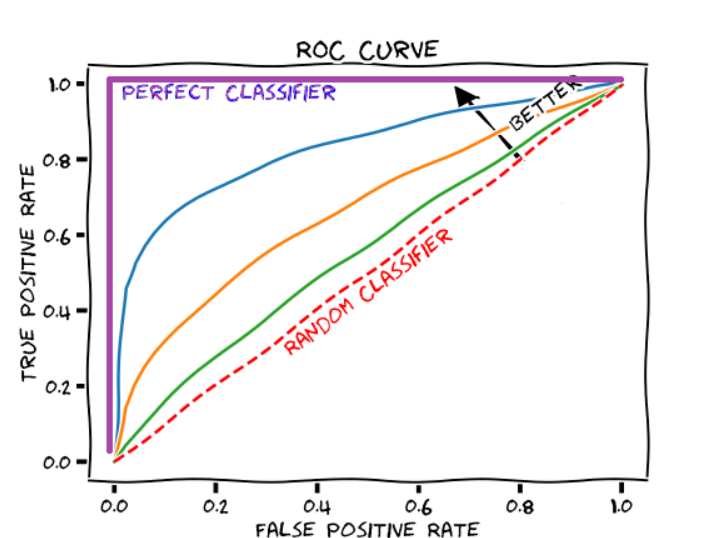

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Import Necessary Libraries</h2>
</div>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, make_scorer, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Read The Data</h2>
</div>

In [9]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")

In [10]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [11]:
train_df.drop(["id"], axis=1, inplace=True)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Sanity Check of Data</h2>
</div>

In [9]:
print("the shape of train data: ", train_df.shape)

the shape of train data:  (11504798, 11)


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


In [12]:
train_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
train_df.duplicated().sum()

0

In [14]:
for i in train_df.select_dtypes(include="object").columns:
	print(train_df[i].value_counts())
	print("***" * 10)

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64
******************************
Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64
******************************
Vehicle_Damage
Yes    5783229
No     5721569
Name: count, dtype: int64
******************************


<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Exploratory Data Analysis (EDA)</h2>
</div>

In [14]:
# descriptive statistics
numerical_summary = train_df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Age,11504798.000000,38.383563,14.993459,20.000000,24.000000,36.000000,49.000000,85.000000
Driving_License,11504798.000000,0.998022,0.044431,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,11504798.000000,26.418690,12.991590,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,11504798.000000,0.462997,0.498629,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,11504798.000000,30461.370411,16454.745205,2630.000000,25277.000000,31824.000000,39451.000000,540165.000000
Policy_Sales_Channel,11504798.000000,112.425442,54.035708,1.000000,29.000000,151.000000,152.000000,163.000000
Vintage,11504798.000000,163.897744,79.979531,10.000000,99.000000,166.000000,232.000000,299.000000
Response,11504798.000000,0.122997,0.328434,0.000000,0.000000,0.000000,0.000000,1.000000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #180161; font-size:100%; text-align:left; color:white">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>

**Age Distribution:**
The age of customers ranges from **20 to 85 years**, with an **average age of approximately 38.38 years**.
This suggests a **wide age range** among the customers, which might **influence their insurance needs and responses**.
    
**Driving License:**
Almost all **customers have a driving license**, with a mean value of 0.998.
This indicates that very **few customers do not have a driving license**.
    
**Region Code:**
**Region codes vary from 0 to 52**, with a mean value of 26.42.
This suggests that **customers are spread across different regions**, which might have **varying risk profiles and insurance needs**.
    
**Previously Insured:**
About **46.3% of customers were previously insured**, as **indicated by the mean value of 0.463**.
This could impact their **likelihood of responding positively to a new insurance offer**.
    
**Annual Premium:**
The **annual premium amounts range from 2,630 to 540,165**, with an **average of 30,461.37**.
The large **standard deviation of 16,454.75 indicates significant variability in the premium amounts paid** by customers.
    
**Policy Sales Channel:**
The **policy sales channels range from 1 to 163**, with a mean value of 112.43.
This suggests a **wide variety of sales channels used, which might influence customer responses**.
    
**Vintage:**
The average vintage **(number of days the customer has been associated with the company) is approximately 163.90 days**, ranging from **10 to 299 days**.
**Customers' tenure with the company might affect their loyalty** and response to offers.
    
**Response:**
The target variable Response has a mean value of 0.123, **indicating that about 12.3% of customers responded positively to the automobile insurance offer**.
**This suggests an imbalanced dataset where the majority of customers did not respond positively**, **which is important to consider during modeling.**

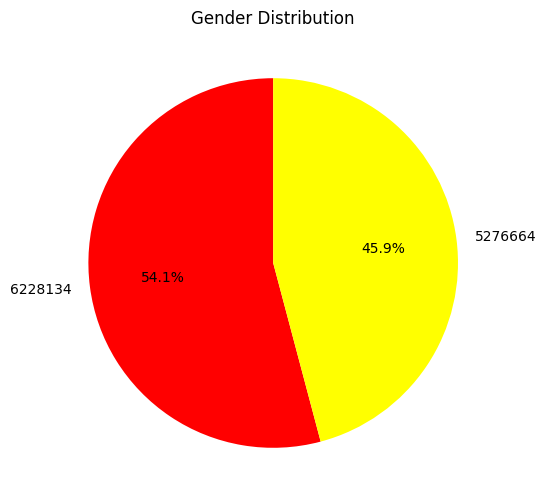

In [8]:
gender_counts = train_df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', colors=['red', 'yellow'], startangle=90,)
plt.title('Gender Distribution')
plt.show()

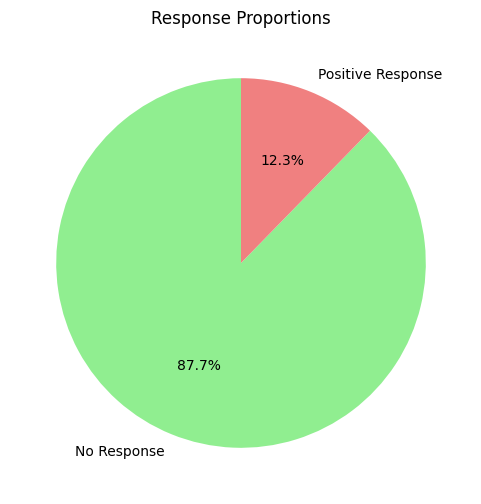

In [16]:
response_counts = train_df['Response'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Response Proportions')
plt.show()

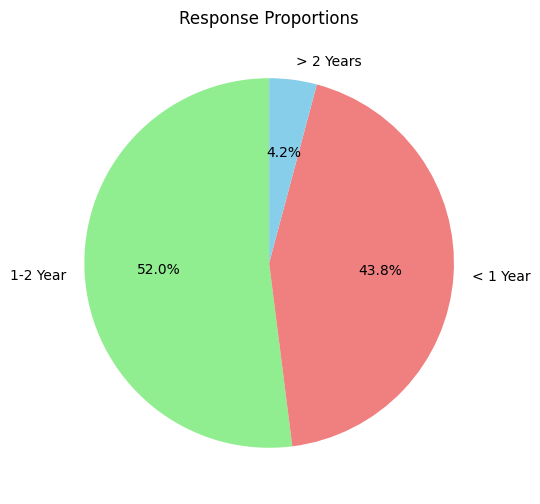

In [17]:
response_counts = train_df['Vehicle_Age'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['1-2 Year', '< 1 Year', '> 2 Years'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'], startangle=90)
plt.title('Response Proportions')
plt.show()

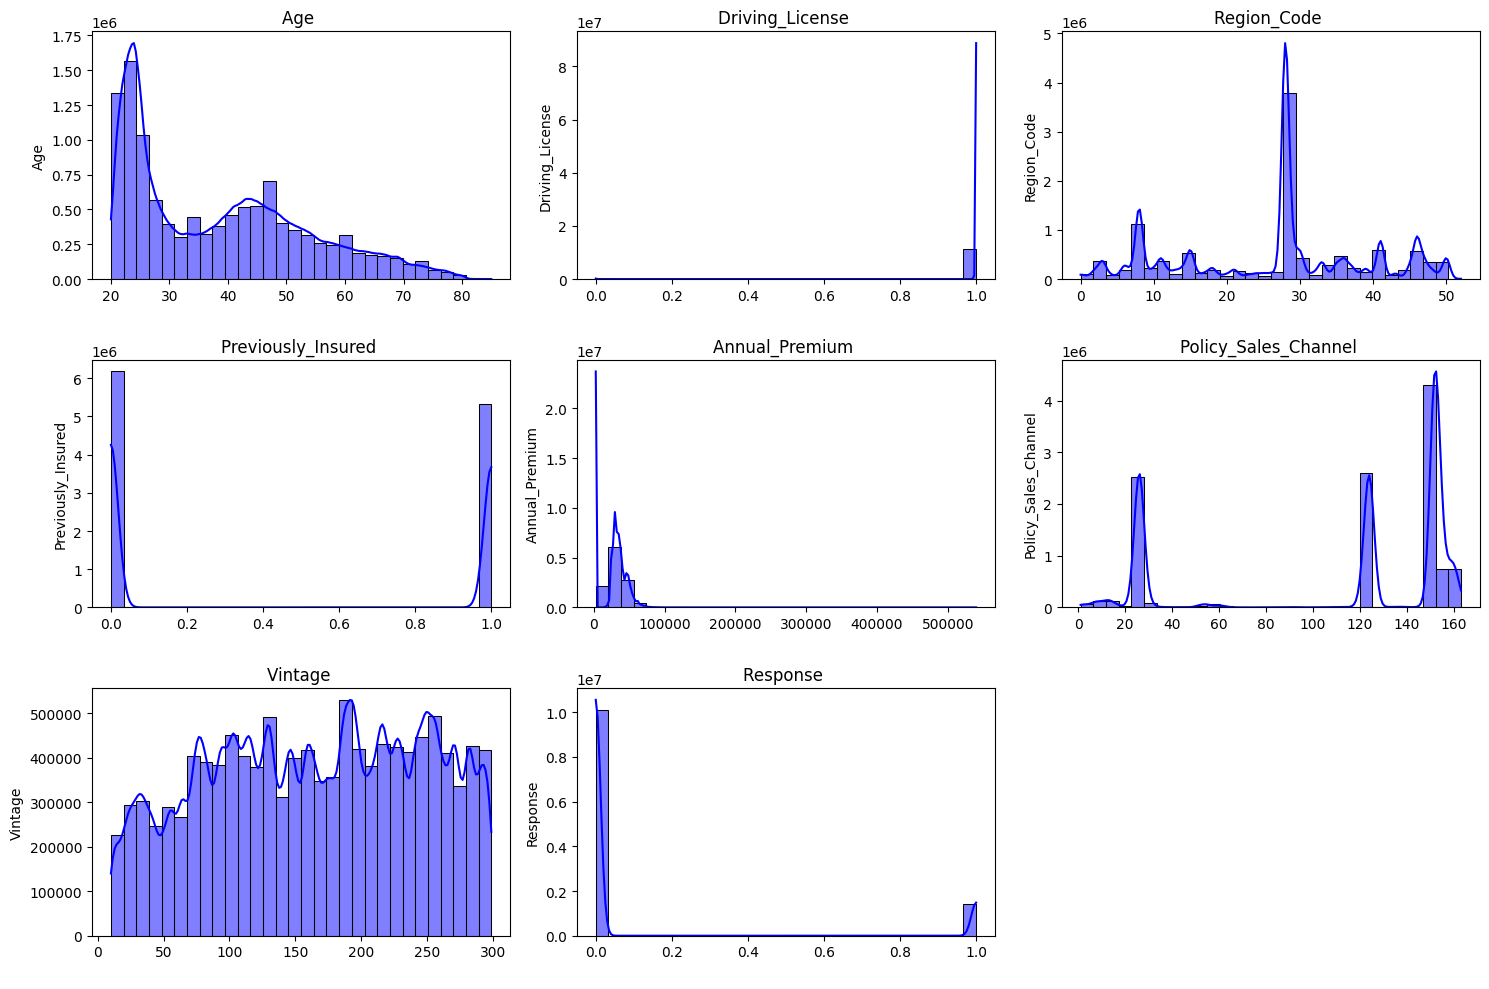

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(train_df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=train_df, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

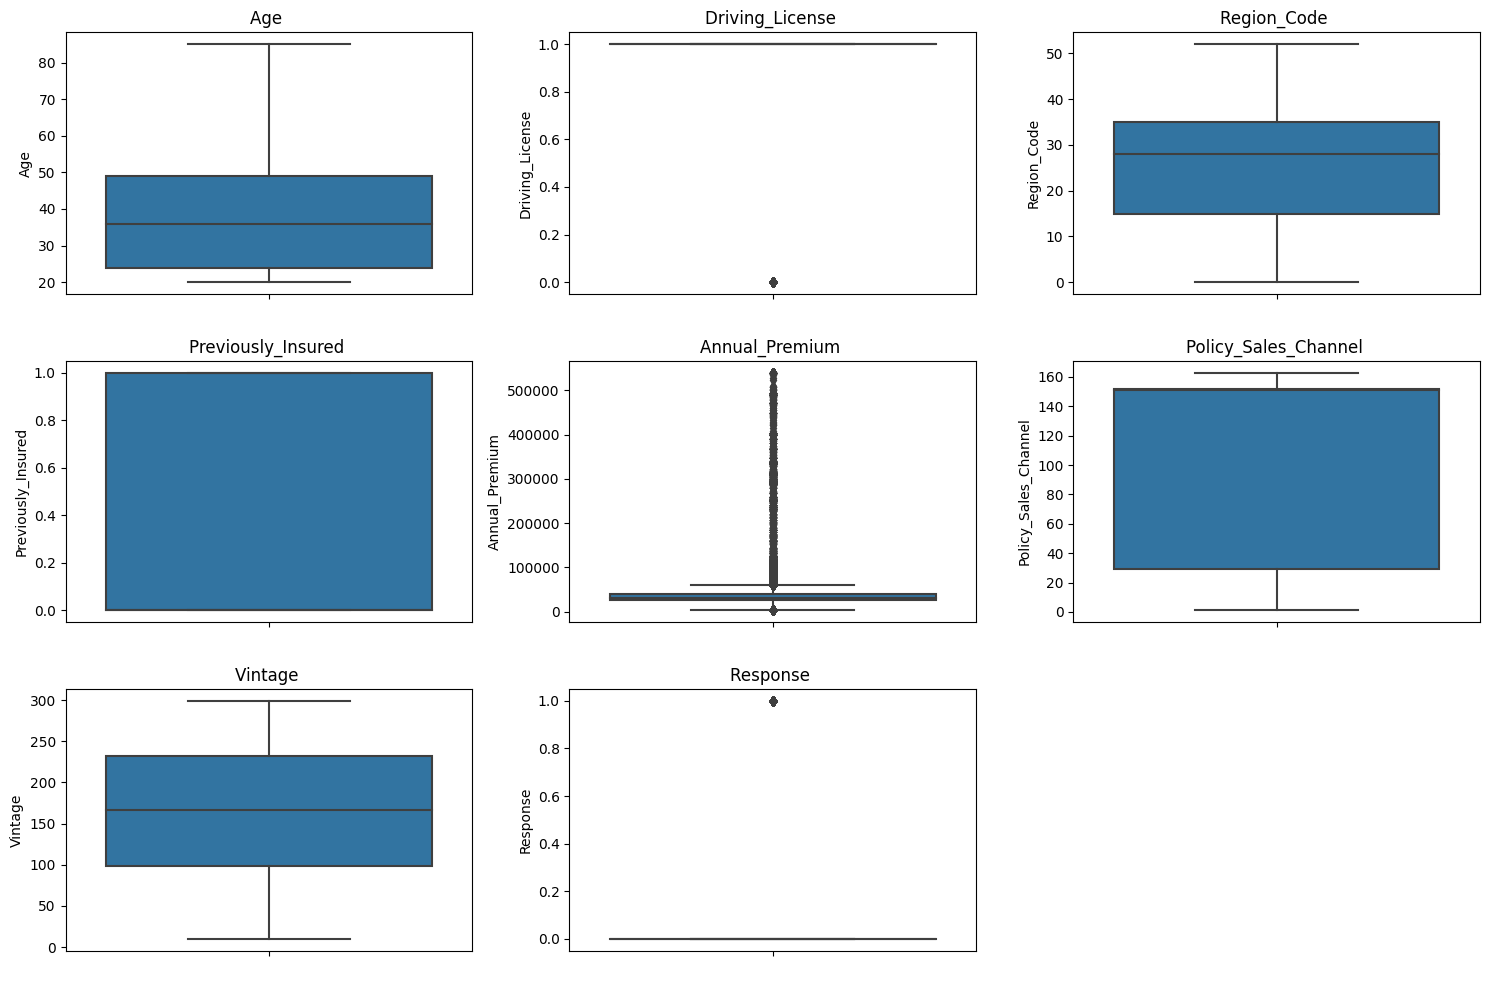

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(train_df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=train_df, y=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Encoding</h2>
</div>

In [12]:
train_df["Gender"] = train_df["Gender"].map({"Male": 0, "Female": 1})
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,1,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,1,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,1,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [13]:
train_df["Vehicle_Age"] = train_df["Vehicle_Age"].map({"1-2 Year": 0, "< 1 Year": 1, "> 2 Years": 2})
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,0,Yes,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,Yes,58911.0,26.0,288,1
2,1,25,1,14.0,1,1,No,38043.0,152.0,254,0
3,1,35,1,1.0,0,0,Yes,2630.0,156.0,76,0
4,1,36,1,15.0,1,0,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,0,Yes,27412.0,26.0,218,0
11504794,1,26,1,36.0,0,1,Yes,29509.0,152.0,115,1
11504795,1,29,1,32.0,1,1,No,2630.0,152.0,189,0
11504796,1,51,1,28.0,0,0,Yes,48443.0,26.0,274,1


In [14]:
train_df["Vehicle_Damage"] = train_df["Vehicle_Damage"].map({"Yes": 1, "No": 0})
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,1,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,1,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,1,36,1,15.0,1,0,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,0,1,27412.0,26.0,218,0
11504794,1,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,1,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,1,51,1,28.0,0,0,1,48443.0,26.0,274,1


<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Correlation Matrix</h2>
</div>

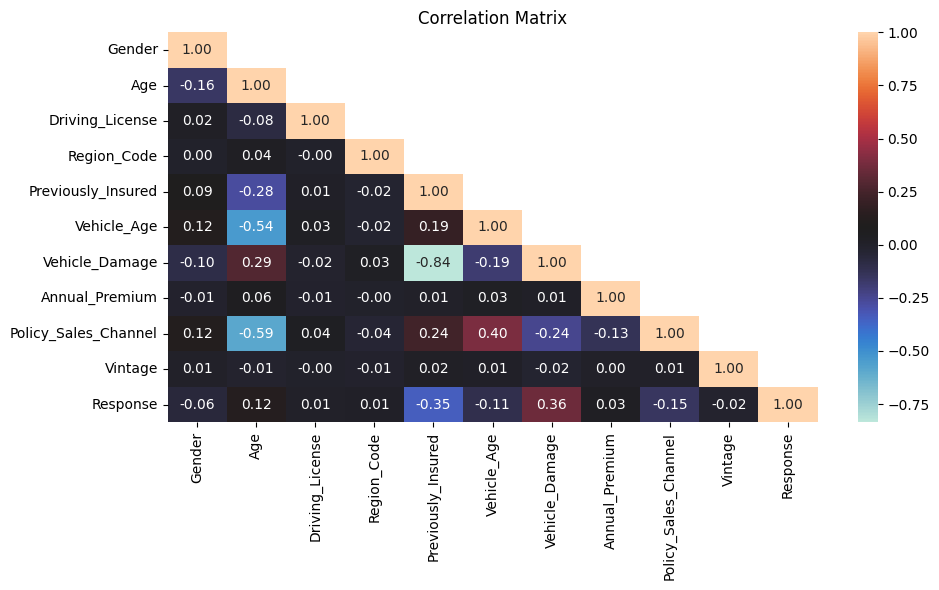

In [23]:
corr = train_df.corr()
mask_ut = np.triu(np.ones(corr.shape), k=1).astype(bool)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [24]:
palette = sns.color_palette("viridis", as_cmap=True)

corr.style.background_gradient(cmap=palette)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.157663,0.018702,0.000106,0.087614,0.117661,-0.096989,-0.010652,0.116058,0.009535,-0.055212
Age,-0.157663,1.000000,-0.078519,0.037041,-0.276248,-0.537738,0.287952,0.056327,-0.591443,-0.013293,0.122134
Driving_License,0.018702,-0.078519,1.000000,-0.001329,0.013733,0.029308,-0.015563,-0.007300,0.042941,-0.000697,0.009197
Region_Code,0.000106,0.037041,-0.001329,1.000000,-0.022367,-0.023707,0.026468,-0.001741,-0.037606,-0.005537,0.012816
Previously_Insured,0.087614,-0.276248,0.013733,-0.022367,1.000000,0.191106,-0.836214,0.007665,0.236838,0.019431,-0.345930
Vehicle_Age,0.117661,-0.537738,0.029308,-0.023707,0.191106,1.000000,-0.189672,0.029708,0.395323,0.013875,-0.111630
Vehicle_Damage,-0.096989,0.287952,-0.015563,0.026468,-0.836214,-0.189672,1.000000,0.012728,-0.241036,-0.019393,0.359780
Annual_Premium,-0.010652,0.056327,-0.007300,-0.001741,0.007665,0.029708,0.012728,1.000000,-0.128559,0.003284,0.032261
Policy_Sales_Channel,0.116058,-0.591443,0.042941,-0.037606,0.236838,0.395323,-0.241036,-0.128559,1.000000,0.008999,-0.152733
Vintage,0.009535,-0.013293,-0.000697,-0.005537,0.019431,0.013875,-0.019393,0.003284,0.008999,1.000000,-0.015177


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #180161; font-size:100%; text-align:left; color:white">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
**Age vs. Vehicle_Age**:
There is a strong negative correlation (-0.5377), indicating that as age increases, the age of the vehicle tends to decrease. This makes sense as older individuals may prefer newer vehicles.
    
**Previously_Insured vs. Vehicle_Damage:**
There is a strong negative correlation (-0.8362), suggesting that individuals who have not previously been insured are more likely to have vehicle damage. This makes intuitive sense since insured individuals might be more cautious about vehicle maintenance.
    
**Policy_Sales_Channel vs. Channel_Vintage:**
There is a strong positive correlation (0.6673), indicating that certain policy sales channels are associated with longer customer vintage. This suggests that specific sales channels are successful in retaining customers over time.
    
**Previously_Insured vs. Response:**
There is a moderate negative correlation (-0.3459), indicating that individuals who are previously insured are less likely to respond positively to insurance offers. This could be due to perceived redundancy or satisfaction with current coverage.
    
**Vehicle_Damage vs. Response:**
There is a moderate positive correlation (0.3598), suggesting that individuals with vehicle damage are more likely to respond positively to insurance offers. This implies that damaged vehicles might prompt individuals to seek additional or improved insurance coverage.

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Outlier Treatment</h2>
</div>

In [15]:
max_limit = train_df.Annual_Premium.mean() + 1.75 * train_df.Annual_Premium.std()
min_limit = train_df.Annual_Premium.mean() - 1.75 * train_df.Annual_Premium.std()


train_df = train_df[(train_df.Annual_Premium > min_limit) & (train_df.Annual_Premium < max_limit)]

In [18]:
train_df.shape

(11200230, 11)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Feature Engineering</h2>
</div>

In [19]:
def feature_engineering(df):
    df['Premium_Per_Day'] = df['Annual_Premium'] / df['Vintage']
    
    df['Insured_And_Damaged'] = df['Previously_Insured'] * df['Vehicle_Damage']
    
    df['Driving_Experience'] = df.apply(lambda x: x['Age'] - 18 if x['Driving_License'] == 1 else 0, axis=1)
    
    avg_premium_per_region = df.groupby('Region_Code')['Annual_Premium'].mean().to_dict()
    df['Avg_Premium_Per_Region'] = df['Region_Code'].map(avg_premium_per_region)
    
    df['Age_to_Premium'] = df['Age'] / df['Annual_Premium']
    
    df['Age_Annual_Premium'] = df['Age'] * df['Annual_Premium']
    
    return df

train_df = feature_engineering(train_df)

In [20]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Premium_Per_Day,Insured_And_Damaged,Driving_Experience,Avg_Premium_Per_Region,Age_to_Premium,Age_Annual_Premium
1,0,43,1,28.0,0,2,1,58911.0,26.0,288,1,204.552083,0,25.0,37653.965500,0.000730,2533173.0
2,1,25,1,14.0,1,1,0,38043.0,152.0,254,0,149.775591,0,7.0,24518.423342,0.000657,951075.0
3,1,35,1,1.0,0,0,1,2630.0,156.0,76,0,34.605263,0,17.0,2689.209068,0.013308,92050.0
4,1,36,1,15.0,1,0,0,31951.0,152.0,294,0,108.676871,0,18.0,28884.948762,0.001127,1150236.0
5,1,31,1,47.0,1,1,0,28150.0,152.0,197,0,142.893401,0,13.0,29588.472805,0.001101,872650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,0,1,27412.0,26.0,218,0,125.743119,0,30.0,24811.180126,0.001751,1315776.0
11504794,1,26,1,36.0,0,1,1,29509.0,152.0,115,1,256.600000,0,8.0,28175.948360,0.000881,767234.0
11504795,1,29,1,32.0,1,1,0,2630.0,152.0,189,0,13.915344,0,11.0,23303.934960,0.011027,76270.0
11504796,1,51,1,28.0,0,0,1,48443.0,26.0,274,1,176.799270,0,33.0,37653.965500,0.001053,2470593.0


In [21]:
train_df.shape

(11200230, 17)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Feature Selection</h2>
</div>

In [39]:
X = train_df.drop(["Response", "Driving_License", "Previously_Insured"], axis=1)
y = train_df["Response"]

In [40]:
k_best = SelectKBest(score_func=f_classif, k='all')

X = k_best.fit_transform(X, y)

In [41]:
X.shape

(11200230, 14)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Handeling Inbalance Data</h2>
</div>

In [43]:
smote = SMOTE(sampling_strategy="minority")
X_sam, y_sam = smote.fit_resample(X,y)

y_sam.value_counts()

Response
1    9832191
0    9832191
Name: count, dtype: int64

In [44]:
X = pd.DataFrame(X_sam, columns=train_df.drop(["Response", "Driving_License", "Previously_Insured"], axis=1).columns)
y = pd.Series(y_sam)

In [45]:
del X_sam
del y_sam

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Train Test Split</h2>
</div>

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17697943, 14), (1966439, 14), (17697943,), (1966439,))

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Model Building</h2>
</div>

In [47]:
dt = DecisionTreeClassifier(random_state=42)

In [48]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px; border:#DEB887 solid;">
    <h2 style="text-align: center">Evaluation</h2>
</div>

### First Round

In [ ]:
y_pred_dt = dt.predict(x_test)

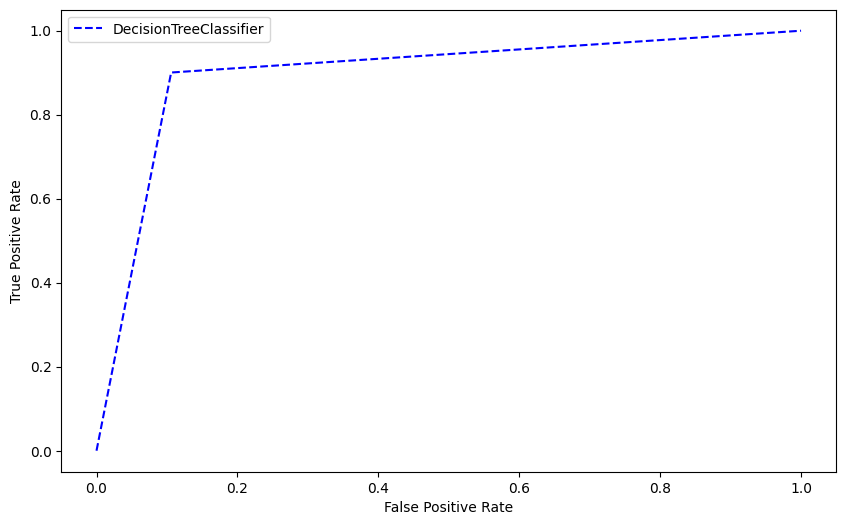

In [54]:
def evaluate_model(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return fpr, tpr, auc

fpr_dt, tpr_dt, auc_dt = evaluate_model(y_test, y_pred_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, linestyle='--', label='DecisionTreeClassifier', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [33]:
print("AUC Score for DecisionTreeClassifier: ", auc_dt)

AUC Score for DecisionTreeClassifier:  0.8974196519876159


In [34]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90    983220
           1       0.90      0.90      0.90    983219

    accuracy                           0.90   1966439
   macro avg       0.90      0.90      0.90   1966439
weighted avg       0.90      0.90      0.90   1966439



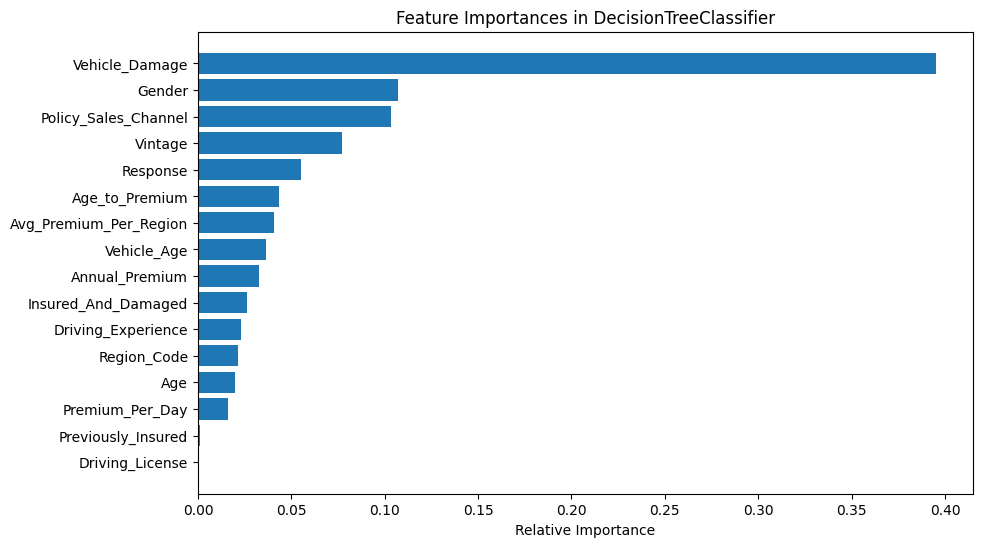

In [37]:
importances = dt.feature_importances_
feature_names = train_df.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in DecisionTreeClassifier")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Second Round

In [49]:
y_pred_dt = dt.predict(x_test)

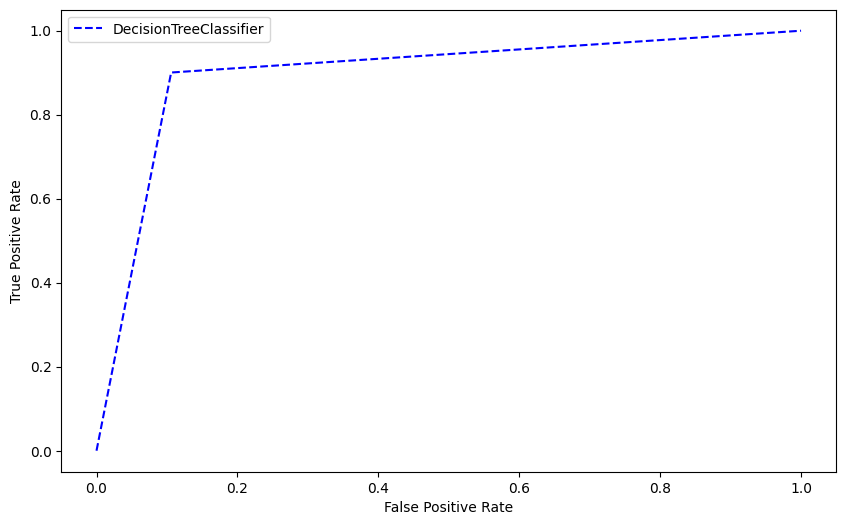

In [50]:
def evaluate_model(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return fpr, tpr, auc

fpr_dt, tpr_dt, auc_dt = evaluate_model(y_test, y_pred_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, linestyle='--', label='DecisionTreeClassifier', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [51]:
print("AUC Score for DecisionTreeClassifier: ", auc_dt)

AUC Score for DecisionTreeClassifier:  0.8972752285868522


In [52]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90    983220
           1       0.89      0.90      0.90    983219

    accuracy                           0.90   1966439
   macro avg       0.90      0.90      0.90   1966439
weighted avg       0.90      0.90      0.90   1966439



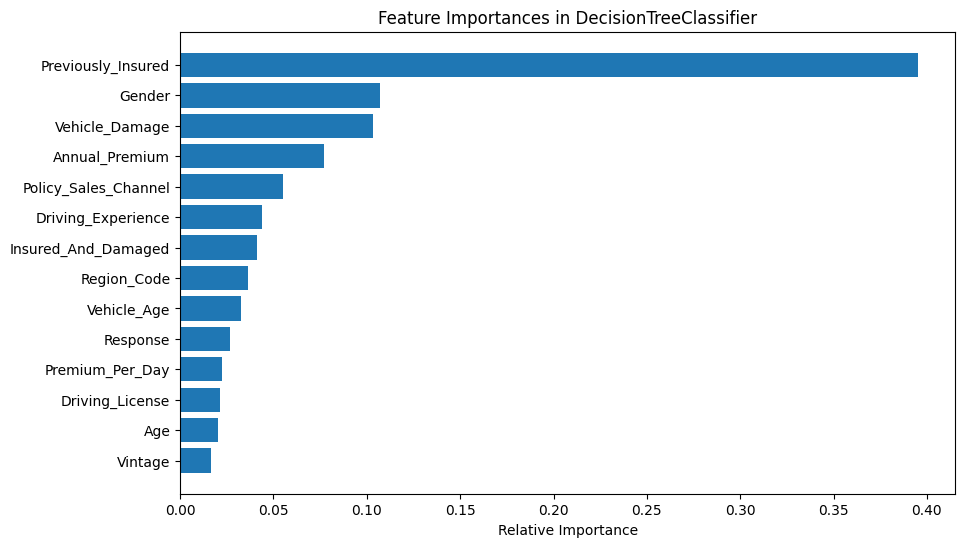

In [53]:
importances = dt.feature_importances_
feature_names = train_df.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in DecisionTreeClassifier")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()